# Import Required Libraries
Import necessary libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn.

In [1]:
# Ensure all libraries are up to date to avoid compatibility issues
%pip install --upgrade numpy pandas matplotlib scikit-learn
%pip install seaborn --upgrade
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Load the Dataset
Load the dataset from the specified path using pandas.

In [2]:
# Load the Dataset
df = pd.read_csv('/home/wtc01/Documents/workplace/House-Price-Prediction-Project/updated_house_price_by_area.csv')


df.head()

,LotArea,SalePrice,LogLotArea,LogSalePrice
0,138,1204000,4.927254,14.001160
1,145,1274000,4.976734,14.057672
2,152,1673000,5.023881,14.330129
3,152,1232000,5.023881,14.024149
4,152,1195600,5.023881,13.994159


# Data Overview
Display the first few rows of the dataset and summary statistics.

In [3]:
# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

LotArea         0
SalePrice       0
LogLotArea      0
LogSalePrice    0
dtype: int64

# Exploratory Data Analysis (EDA)
Visualize the relationship between LotArea and SalePrice using scatter plots, histograms, and boxplots.

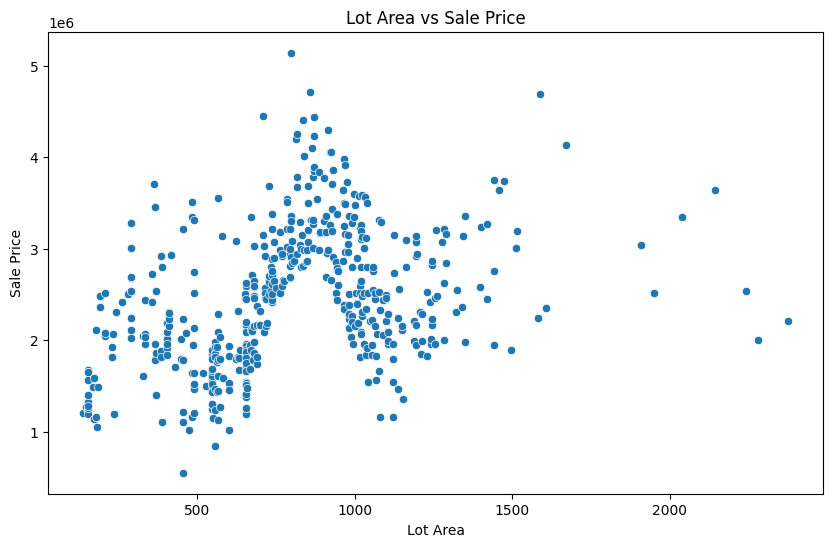

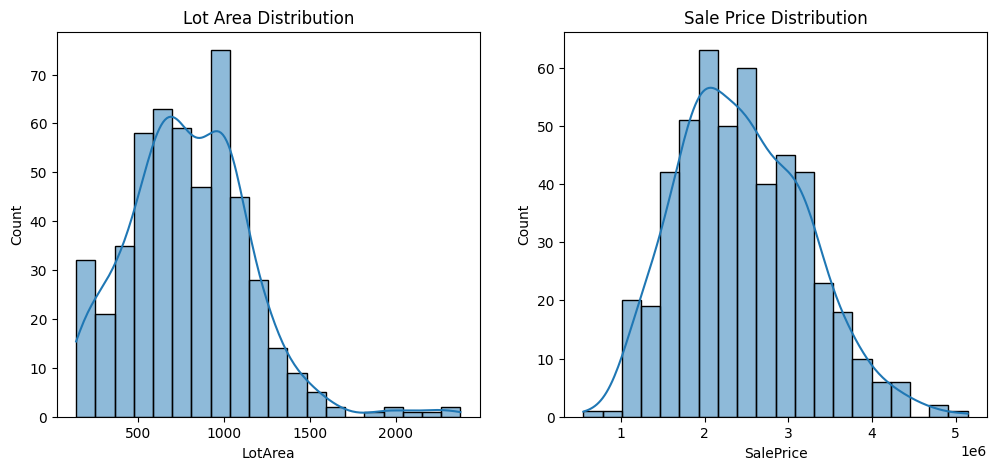

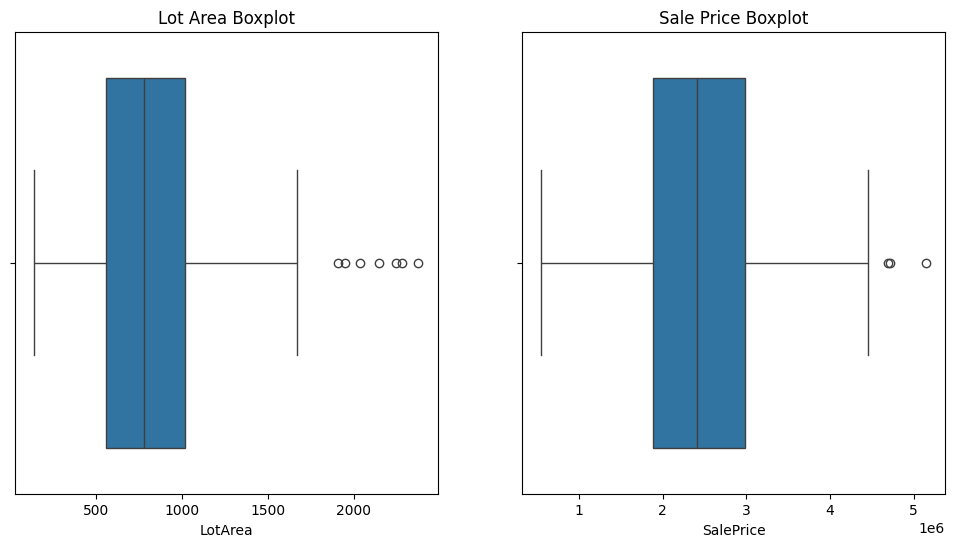

In [4]:
# Exploratory Data Analysis (EDA)
# Visualizing the Relationship between LotArea and SalePrice

# Scatter plot of LotArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

# Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['LotArea'], kde=True, bins=20)
plt.title('Lot Area Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.title('Sale Price Distribution')

plt.show()

# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['LotArea'])
plt.title('Lot Area Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['SalePrice'])
plt.title('Sale Price Boxplot')

plt.show()

# Data Preprocessing
Perform log transformation on LotArea and SalePrice, and scale the features using StandardScaler.

In [5]:
# Data Preprocessing
# Perform log transformation on LotArea and SalePrice
df['LogLotArea'] = np.log(df['LotArea'])
df['LogSalePrice'] = np.log(df['SalePrice'])

# Initialize the scaler
scaler = StandardScaler()

# Select the features for scaling
X = df[['LotArea', 'LogLotArea']]
y = df['LogSalePrice']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train-Test Split
Split the dataset into training and testing sets using train_test_split.

In [6]:
# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Building
Build and train a Linear Regression model and a Random Forest model using the training data.

In [7]:
# Model Building
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation
Evaluate the models using RMSE and R² metrics, and compare their performance.

Linear Regression - RMSE: 0.30900658937021563, R²: 0.17924771867069744
Random Forest - RMSE: 0.2954033246235791, R²: 0.24992036392564276


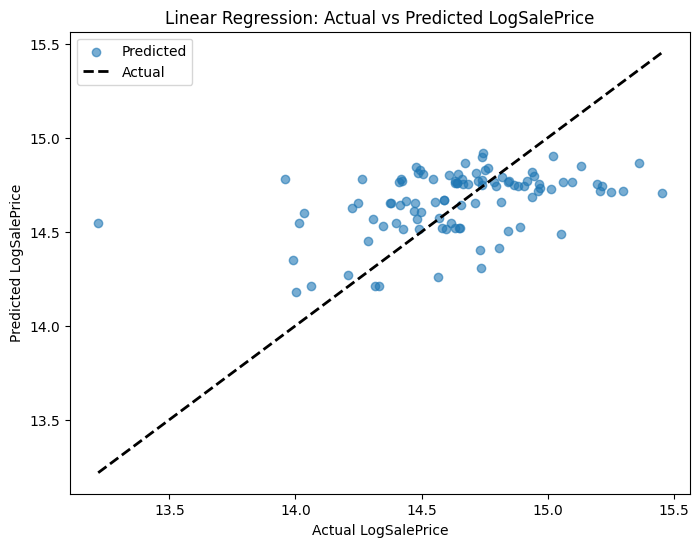

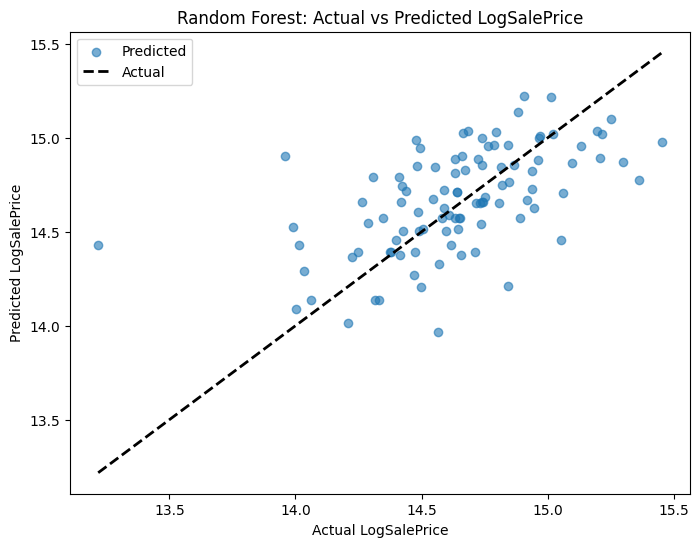

In [8]:
# Model Evaluation
# Evaluate the models using RMSE and R² metrics, and compare their performance

# Predicting on the test set
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculate RMSE and R² for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate RMSE and R² for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

# Visualizing Predictions vs Actual Values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, label='Predicted', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual LogSalePrice')
plt.ylabel('Predicted LogSalePrice')
plt.title('Linear Regression: Actual vs Predicted LogSalePrice')
plt.legend()
plt.show()

# Visualizing Predictions vs Actual Values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, label='Predicted', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual LogSalePrice')
plt.ylabel('Predicted LogSalePrice')
plt.title('Random Forest: Actual vs Predicted LogSalePrice')
plt.legend()
plt.show()

# Visualizing Predictions vs Actual Values
Plot the actual vs predicted SalePrice values to visualize the model's performance.

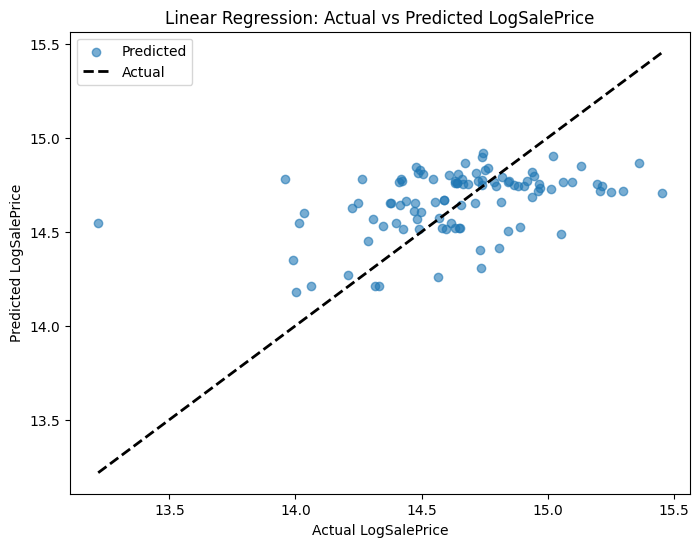

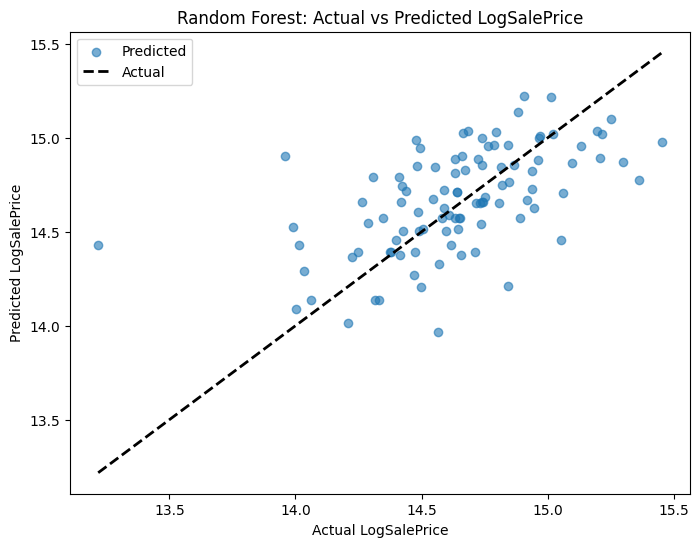

In [9]:
# Visualizing Predictions vs Actual Values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, label='Predicted', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual LogSalePrice')
plt.ylabel('Predicted LogSalePrice')
plt.title('Linear Regression: Actual vs Predicted LogSalePrice')
plt.legend()
plt.show()

# Visualizing Predictions vs Actual Values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, label='Predicted', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual LogSalePrice')
plt.ylabel('Predicted LogSalePrice')
plt.title('Random Forest: Actual vs Predicted LogSalePrice')
plt.legend()
plt.show()

## REPORT

### Workflow Summary
1. **Import Required Libraries**: Imported necessary libraries such as pandas, numpy, seaborn, matplotlib, and scikit-learn.
2. **Load the Dataset**: Loaded the dataset from the specified path using pandas.
3. **Data Overview**: Displayed the first few rows of the dataset and summary statistics.
4. **Exploratory Data Analysis (EDA)**: Visualized the relationship between LotArea and SalePrice using scatter plots, histograms, and boxplots.
5. **Data Preprocessing**: Performed log transformation on LotArea and SalePrice, and scaled the features using StandardScaler.
6. **Train-Test Split**: Split the dataset into training and testing sets using train_test_split.
7. **Model Building**: Built and trained a Linear Regression model and a Random Forest model using the training data.
8. **Model Evaluation**: Evaluated the models using RMSE and R² metrics, and compared their performance.
9. **Visualizing Predictions vs Actual Values**: Plotted the actual vs predicted SalePrice values to visualize the model's performance.

### Results
- **Linear Regression Model**:
  - RMSE: 0.30900658937021563
  - R²: 0.17924771867069744

- **Random Forest Model**:
  - RMSE: 0.2954033246235791
  - R²: 0.24992036392564276

The Random Forest model performed better than the Linear Regression model based on the RMSE and R² metrics.

